In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Функционал качества
def Q_calculate(X, y, w, t):
    Q = np.dot(np.dot(w.T,X.T),np.dot(X,w)) - 2*np.dot(np.dot(w.T,X.T),y) + np.dot(y.T, y) + t*np.dot(w.T,w)
    return Q

In [4]:
# Шаг регрессии
def sgs(X, y, w, h, t, rand):
    x_k = X[rand]
    y_k = y[rand]
    return w*(1 - h*t) - (np.dot(w, x_k) - y_k) * 2 * h * x_k

In [5]:
# Стохастический градиент
def SGD(X, y, w_init, t = 0.01, eps = 1e-3, max_iter = 1e5):
    w = w_init
    Q_values = []

    Q = Q_calculate(X, y, w, t)
    h = 1
    i = 1
    count = 0
    while count < 10 and i < max_iter:
        Q_prev = Q

        rand = random.randint(0, len(X)-1)
        w = sgs(X, y, w, h, t, rand)
        Q = Q_calculate(X, y, w, t)
        Q_values = np.append(Q_values, Q)

        if abs(Q - Q_prev) < eps:
            count += 1
        else:
            count = 0

        i += 1
        h = 1 / i

    return w, Q_values, t

In [6]:
def cross_validation(X_test, Y_test, w_o):
    n = 100
    r_values = np.zeros(n)
    t_values = np.zeros(n)
    w_arr = np.zeros((n, len(w_o)))

    i = 0
    t = 0
    while i < n:
        w, Q_values, t = SGD(X_test, Y_test, w_o, t)

        Y_pred = predict(X_test, w)
        r = np.corrcoef(Y_test, Y_pred)[0, 1]
        r_values[i] = r ** 2
        t_values[i] = t
        w_arr[i] = w

        t += 0.01
        i += 1
    
    return r_values, t_values, w_arr

In [7]:
def predict(X, w):
    return np.dot(X, w)

In [13]:
# dataset
# data = load_iris()
# X = data.data
# y = data.target

from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 200,n_features=5)
# scaler data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
    
X = np.hstack((np.ones((X.shape[0], 1)) * -1, X)) #добавляем столбец

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y,  train_size = 0.7, test_size = 0.3)

In [14]:
w_o, Q_values, t = SGD(X_train, Y_train, np.zeros( X.shape[1]) ) 

r_values, t_values, w_arr = cross_validation(X_test, Y_test, w_o)

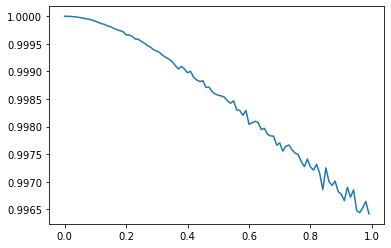

In [16]:
plt.plot(t_values, r_values)

In [20]:
index = np.argsort(r_values)[-1]

r = r_values[index]
t = t_values[index]

w, Q_values, t = SGD(X_test, Y_test, w_o, t)

Q = Q_values[-1]

print(w,r,t,Q)

[ 3.75126247 22.96667857 39.58092075 21.06928249 81.09408329 55.89346641] 0.9999999841401791 0.0 0.058816688833758235


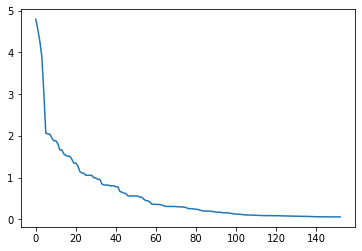

In [21]:
plt.plot(Q_values[-len(Q_values)+50:])